# Analyzing Customer Behavior and Segmentation:

## Table of Contents:
1. **[Project Objective](#1)**
2. **[Load and Discover the Datasets](#2)**
    1. **[Transaction Dataset](#2.A)**
    2. **[Customer Dataset](#2.B)**
3. **[Clean & Transform Datasets](#3)**
    1. **[Transaction Dataset](#3.A)**
    2. **[Customer Dataset](#3.B)**
4. **[Features Engineering](#4)**
5. **[Data Integration](#5)**
6. **[Data Analysis](#6)**
    1. **[Define Metrics](#6.A)**
    2. **[Customer Segmentation](#6.B)**
    3. **[Customer Behavior Analysis](#6.C)**
    4. **[Deep Dive into Customer Segments Analysis](#6.D)**
    5. **[Market Basket Analysis for all Customers](#6.E)**
7. **[Conclusion](#7)**
    1. **[Insights](#7.A)**
    2. **[Recommendation](#7.B)**

<a name="1"></a>
## 1. Project Objective:

The client is the Category Manager for Chips at a chain supermarkets. The client wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.
The insights from this project will feed into the supermarket’s strategic plan for the chip category in the next half year.
We have two datasets for this project (Transaction Dataset and Customer Dataset).

In [ ]:
## Use this command to install the MLXtend library
pip install mlxtend 

In [2]:
## import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

<a name="2"></a>
## 2. Load and Discover the Datasets:

<a name="2.A"></a>
### A. Transaction Dataset:

In [3]:
## read the transaction_data table from Excel file
transaction= pd.read_excel('D:\\Data Analysis\\Data Analysis Projects\\Quantium Data Analytics Project\\Task 1 Data Preparation And Customer Analytics\\QVI_transaction_data.xlsx')

## Show the first 5 rows of the table
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
## Show information about the table such as number of columns and rows, number of non-null values in each column and datatype of each column
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


<a name="2.B"></a>
### B. Customer Dataset:

In [6]:
customer= pd.read_csv('D:\\Data Analysis\\Data Analysis Projects\\Quantium Data Analytics Project\\Task 1 Data Preparation And Customer Analytics\\QVI_purchase_behaviour.csv')
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
customer.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


<a name="3"></a>
## 3. Clean & Transform Datasets:

<a name="3.A"></a>
### A. Transaction Dataset:

In [9]:
## Convert the datatype of DATE column from int to datetime and correct the values of it.
## The integer values in the DATE column represnt the number of days since 1900-01-01, 
## so we convert the integer values to timedelta then add them to the date 1900-01-01 to get the real date.

reference_date = pd.to_datetime('1900-01-01')
transaction['DATE']= reference_date + pd.to_timedelta(transaction['DATE'], unit='D')

In [10]:
## Check if there is any null values in the table
check_nulls= transaction.isna()
check_nulls.any(axis=0)

DATE              False
STORE_NBR         False
LYLTY_CARD_NBR    False
TXN_ID            False
PROD_NBR          False
PROD_NAME         False
PROD_QTY          False
TOT_SALES         False
dtype: bool

**Note:** There is no any null value in transaction dataset.

In [11]:
## Check for duplications
transaction[transaction.duplicated(keep=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,2018-10-03,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,2018-10-03,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


**Note:** We found there is one duplication, but we don't know if it is a dupliction or the customer ordered the same product twice in the same transaction. So we should check the customer and the transaction of this row.

In [12]:
## Here we checked the customer and the transaction and we found there are three orders in this transaction.
## The duplicated rows are the first and the third, so it may be not duplication.
transaction[(transaction['LYLTY_CARD_NBR']== 107024) & (transaction['TXN_ID']== 108462)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,2018-10-03,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124844,2018-10-03,107,107024,108462,18,Cheetos Chs & Bacon Balls 190g,2,6.6
124845,2018-10-03,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


**Note:** According to the previous result, we found there are three orders in this transaction, the first one and the third are the same, so it may be not duplicates, the customer might order the same product twice in the same transaction.

In [13]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [14]:
## Check for outliers.
transaction.sort_values(by= 'TOT_SALES', ascending= False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-21,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-22,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
69496,2018-08-17,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
55558,2019-05-16,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
171815,2018-08-19,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
...,...,...,...,...,...,...,...,...
259695,2018-11-15,41,41089,38002,76,Woolworths Medium Salsa 300g,1,1.5
259707,2018-10-20,41,41267,38201,76,Woolworths Medium Salsa 300g,1,1.5
197005,2018-08-13,167,167121,168928,76,Woolworths Medium Salsa 300g,1,1.5
216449,2019-03-03,264,264032,262778,76,Woolworths Medium Salsa 300g,1,1.5


**Note:** According to the results of statistics describtion function (discribe()) and the sorting of the values, we found two rows have large values in the columns "PROD_QTY" and "TOT_SALES" the values are 200 and 650 respectively. The transaction of the two rows are for the same customer (LYLTY_CARD_NBR = 226000) and the same product (PROD_NBR= 4), but in different dates (	2018-08-21, 2019-05-22). We should check with our client to make sure if the values are wrong or not. If the values are wrong they should give us the right values to replace or delete them in case they don't have the right values. If the values are true,it is good to know more about this customer, he/she may lead to new type of sales which may increase the sales or revenue. Now we will execlude these rows from the dataset in order to continue our analysis.

In [15]:
transaction_clean= transaction[(transaction['LYLTY_CARD_NBR'] != 226000) & ((transaction['TXN_ID'] != 226201) | (transaction['TXN_ID'] != 226210))]
transaction_clean.sort_values(by= 'TOT_SALES', ascending= False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
55558,2019-05-16,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
5179,2018-08-17,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
117850,2019-05-21,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
150683,2019-05-22,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
184969,2019-05-22,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
...,...,...,...,...,...,...,...,...
1387,2019-04-30,74,74321,73172,76,Woolworths Medium Salsa 300g,1,1.5
262219,2018-11-24,163,163198,163489,35,Woolworths Mild Salsa 300g,1,1.5
55725,2019-01-11,2,2361,959,76,Woolworths Medium Salsa 300g,1,1.5
194299,2019-05-26,124,124335,128076,76,Woolworths Medium Salsa 300g,1,1.5


**Note:** Discover the `PROD_NAME` and check if it contains any error or needs some adjustments.

In [16]:
np.unique(transaction_clean['PROD_NAME'].values)

array(['Burger Rings 220g', 'CCs Nacho Cheese    175g',
       'CCs Original 175g', 'CCs Tasty Cheese    175g',
       'Cheetos Chs & Bacon Balls 190g', 'Cheetos Puffs 165g',
       'Cheezels Cheese 330g', 'Cheezels Cheese Box 125g',
       'Cobs Popd Sea Salt  Chips 110g',
       'Cobs Popd Sour Crm  &Chives Chips 110g',
       'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
       'Dorito Corn Chp     Supreme 380g',
       'Doritos Cheese      Supreme 330g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Doritos Corn Chips  Cheese Supreme 170g',
       'Doritos Corn Chips  Nacho Cheese 170g',
       'Doritos Corn Chips  Original 170g', 'Doritos Mexicana    170g',
       'Doritos Salsa       Medium 300g', 'Doritos Salsa Mild  300g',
       'French Fries Potato Chips 175g',
       'Grain Waves         Sweet Chilli 210g',
       'Grain Waves Sour    Cream&Chives 210G',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Infuzi

**Note:** Firstly, we found unwanted spaces inside values in the `PROD_NAME` column, so we should remove them. Secondly we found the brand name of some products was wrote in different ways so we should unify them in order to extract the brand name from them.

In [17]:
## Remove unwanted spaces in the PROD_NAME column
transaction_clean= transaction_clean.copy()
transaction_clean['PROD_NAME'] = transaction_clean['PROD_NAME'].str.replace(r'\s+', " ", regex= True)

In [18]:
## Prepare the values that we will replace in order to unify the brand names. 
## Create replacements dictionary which contains the old values as keys and the new values as values of the dictionary.
replacements= {
    r'\bDorito\b':'Doritos',
    r'\bGrnWves\b':'Grain Waves',
    r'\bInfzns\b':'Infuzions',
    r'\bNatural Chip Compny\b':'NCC', 
    r'\bNatural Chip Co\b':'NCC', 
    r'\bNatural ChipCo\b':'NCC',
    r'\bRed Rock Deli\b':'RRD',
    r'\bSmith\b':'Smiths',
    r'\bSnbts\b':'Sunbites',
    r'\bWoolworths\b':'WW'  
}

In [19]:
## Now we will replace the values and get uniform brands names.
transaction_clean['PROD_NAME']= transaction_clean['PROD_NAME'].replace(replacements, regex= True)

In [20]:
np.unique(transaction_clean['PROD_NAME'].values)

array(['Burger Rings 220g', 'CCs Nacho Cheese 175g', 'CCs Original 175g',
       'CCs Tasty Cheese 175g', 'Cheetos Chs & Bacon Balls 190g',
       'Cheetos Puffs 165g', 'Cheezels Cheese 330g',
       'Cheezels Cheese Box 125g', 'Cobs Popd Sea Salt Chips 110g',
       'Cobs Popd Sour Crm &Chives Chips 110g',
       'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
       'Doritos Cheese Supreme 330g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Doritos Corn Chips Cheese Supreme 170g',
       'Doritos Corn Chips Nacho Cheese 170g',
       'Doritos Corn Chips Original 170g',
       'Doritos Corn Chp Supreme 380g', 'Doritos Mexicana 170g',
       'Doritos Salsa Medium 300g', 'Doritos Salsa Mild 300g',
       'French Fries Potato Chips 175g',
       'Grain Waves Plus Btroot & Chilli Jam 180g',
       'Grain Waves Sour Cream&Chives 210G',
       'Grain Waves Sweet Chilli 210g',
       'Infuzions BBQ Rib Prawn Crackers 110g',
       'I

<a name="3.B"></a>
### B. Customer Dataset:

In [21]:
## Check if there is any null values in the table
check_nulls= customer.isna()
check_nulls.any(axis=0)

LYLTY_CARD_NBR      False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

**Note:** There is no any null value in the dataset.

In [22]:
## Check for duplications
customer[customer.duplicated(keep=False)]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


**Note:** There is no any duplicate in the dataset.

<a name="4"></a>
## 4. Features Engineering:
**Note:** Now, we will create a new column `PROD_WEIGHT_G` through extracting the weight of each product from `PROD_NAME` column, we need the product weight later in our analysis. 

In [23]:
transaction_clean= transaction_clean.copy()

## Create PROD_WEIGHT_KG column by taking the weight of each product from the PROD_NAME column.
transaction_clean['PROD_WEIGHT_G']= transaction_clean['PROD_NAME'].str.extract(r'(\d{2,4})').astype(int)

**Note:** Here, we will create new column `PROD_PRICE` by dividng `TOT_SALES` column on `PROD_QTY` column

In [24]:
transaction_clean['PROD_PRICE']= transaction_clean['TOT_SALES'] / transaction_clean['PROD_QTY']

**Note:** Here we will create new column `BRAND_NAME` where we will extract the brand name of products from `PROD_NAME` column.

In [25]:
## Firstly, we will create a list of brands name of all products.
brand_names= ['Burger Rings', 'CCs', 'Cheetos', 'Cheezels', 'Cobs Popd', 'Doritos', 'French Fries', 'Grain Waves', 
              'Infuzions', 'Kettle', 'NCC', 'Old El Paso', 'Pringles', 'RRD', 'Smiths', 'Sunbites', 'Thins', 'Tostitos', 
              'Twisties', 'Tyrrells', 'WW']

## Create a regular expression pattern that matches any of the brand names
brand_pattern = r'(' + '|'.join(brand_names) + ')'

## Use str.extract to create the "Brand_Name" column
transaction_clean['BRAND_NAME'] = transaction_clean['PROD_NAME'].str.extract(brand_pattern)

## Check the new dataset
transaction_clean.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT_G,PROD_PRICE,BRAND_NAME
0,2018-10-19,1,1000,1,5,NCC SeaSalt175g,2,6.0,175,3.00,NCC
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,2.10,CCs
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,1.45,Smiths
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,3.00,Smiths
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,4.60,Kettle


<a name="5"></a>
## 5. Data Integration:
**Note:** Now, we will merge the two dataset `customer` and `transaction_clean` to combine the cutsomers information with their transactions details which helps us to start analysis process.

In [26]:
merged_data = pd.merge(customer, transaction_clean, on="LYLTY_CARD_NBR", how="inner")

In [27]:
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT_G,PROD_PRICE,BRAND_NAME
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-19,1,1,5,NCC SeaSalt175g,2,6.0,175,3.0,NCC
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-18,1,2,58,RRD Chikn&Garlic Aioli 150g,1,2.7,150,2.7,RRD
2,1003,YOUNG FAMILIES,Budget,2019-03-09,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,3.6,Grain Waves
3,1003,YOUNG FAMILIES,Budget,2019-03-10,1,4,106,NCC Hony Soy Chckn175g,1,3.0,175,3.0,NCC
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-04,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,1.9,WW


In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   LIFESTAGE         264834 non-null  object        
 2   PREMIUM_CUSTOMER  264834 non-null  object        
 3   DATE              264834 non-null  datetime64[ns]
 4   STORE_NBR         264834 non-null  int64         
 5   TXN_ID            264834 non-null  int64         
 6   PROD_NBR          264834 non-null  int64         
 7   PROD_NAME         264834 non-null  object        
 8   PROD_QTY          264834 non-null  int64         
 9   TOT_SALES         264834 non-null  float64       
 10  PROD_WEIGHT_G     264834 non-null  int32         
 11  PROD_PRICE        264834 non-null  float64       
 12  BRAND_NAME        264834 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), objec

In [29]:
merged_data.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_WEIGHT_G,PROD_PRICE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512,3.824629
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148,1.109526
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000,1.320000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000,3.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000,3.800000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000,4.600000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000,6.500000


<a name="6"></a>
## 6. Data Analysis:

<a name="6.A"></a>
### A. Define Metrics:
Now, we will define the metrics that we will use in our analysis:
The metrics are:
- Total sales.
- Average number of units purchased per customer.
- Average price per unit.
- Frequency of Purchase.

#### - Total Sales:

Here we will calculate the `Total Sales` for all customers:

In [30]:
total_sales= round(merged_data['TOT_SALES'].sum(), 2)
print("The Total Sales is: ", total_sales)

The Total Sales is:  1933115.0


#### - Average number of units purchased per customer:
Here we will calculate the `Average number of units purchased per customer` for all customers:

In [31]:
average_num_of_units= merged_data['PROD_QTY'].sum() / merged_data['LYLTY_CARD_NBR'].nunique()
average_num_of_units= round(average_num_of_units, 2)
print("The Average Number of Units Purchased per Customer is: ", average_num_of_units)

The Average Number of Units Purchased per Customer is:  6.95


So, on average, each customer purchased 6.95 units.

#### - Average Price per Unit:
Here we will calculate the `Average Price per Unit` for all customers:

In [32]:
average_price_per_unit= merged_data['TOT_SALES'].sum() / merged_data['PROD_QTY'].sum()
average_price_per_unit= round(average_price_per_unit, 2)
print("The Average Price per Unit is: ", average_price_per_unit)

The Average Price per Unit is:  3.83


So, on average, the price of each purchased unit is 3.83.

#### - Frequency of Purchase:
Here we will calculate `Frequency of Purchase` for all customers: 

In [33]:
frequency_of_purchase= merged_data['TXN_ID'].nunique() / merged_data['LYLTY_CARD_NBR'].nunique()
frequency_of_purchase= round(frequency_of_purchase, 2)
print("The Frequency of Purchase is: ", frequency_of_purchase)

The Frequency of Purchase is:  3.62


So, on average, each customer made 3.62 purchases.

<a name="6.B"></a>
### B. Customer Segmentation:
- Firstly, We will work on the total number of customers and the number of customers under each category such as `Life Stage` and `Premium Customer`.

In [34]:
## Calculate the total number of customers who have made purchase.
total_customer= merged_data['LYLTY_CARD_NBR'].nunique()
print("The Total Number of Customers is: ", total_customer)

The Total Number of Customers is:  72636


#### 1. Life Stage Segment (LIFESTAGE):
We will find the number of customers of each life stage.

In [35]:
life_stage_segment= merged_data.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].nunique().reset_index()
life_stage_segment= life_stage_segment.sort_values(by= 'LYLTY_CARD_NBR', ascending= False)
life_stage_segment

,LIFESTAGE,LYLTY_CARD_NBR
4,RETIREES,14805
3,OLDER SINGLES/COUPLES,14609
6,YOUNG SINGLES/COUPLES,14441
2,OLDER FAMILIES,9779
5,YOUNG FAMILIES,9178
0,MIDAGE SINGLES/COUPLES,7275
1,NEW FAMILIES,2549


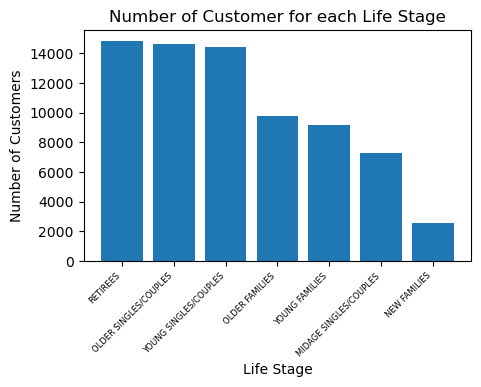

In [36]:
plt.figure(figsize=(5, 3))
plt.bar(life_stage_segment['LIFESTAGE'],life_stage_segment['LYLTY_CARD_NBR'])
plt.title('Number of Customer for each Life Stage')
plt.xlabel('Life Stage')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right',fontsize=6)
plt.show()

**Note:** The top 3 life stages according to the number of customers are:
1. `RETIREES.`
2. `OLDER SINGLES/COUPLES.`
3. `YOUNG SINGLES/COUPLES.`

#### 2. Shopping Behavior and Preferences Segment (PREMIUM_CUSTOMER):
We will find the number of customers of each customer category.

In [37]:
premium_customer_segment= merged_data.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].nunique().reset_index()
premium_customer_segment= premium_customer_segment.sort_values(by= 'LYLTY_CARD_NBR', ascending= False)
premium_customer_segment

,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
1,Mainstream,29245
0,Budget,24470
2,Premium,18921


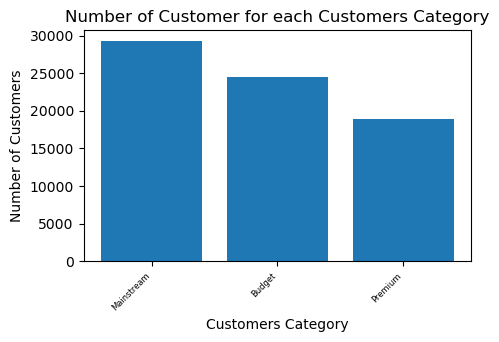

In [38]:
plt.figure(figsize=(5, 3))
plt.bar(premium_customer_segment['PREMIUM_CUSTOMER'],premium_customer_segment['LYLTY_CARD_NBR'])
plt.title('Number of Customer for each Customers Category')
plt.xlabel('Customers Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.show()

**Note:** The first customer category according to the number of customers is `Mainstream`.

#### 3. Customers Distribution of Life Stages and Customer Permium Segmentation (Cross Segmentation):

In [39]:
two_segmentation= merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
two_segmentation

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,1504
1,MIDAGE SINGLES/COUPLES,Mainstream,3340
2,MIDAGE SINGLES/COUPLES,Premium,2431
3,NEW FAMILIES,Budget,1112
4,NEW FAMILIES,Mainstream,849
5,NEW FAMILIES,Premium,588
6,OLDER FAMILIES,Budget,4675
7,OLDER FAMILIES,Mainstream,2831
8,OLDER FAMILIES,Premium,2273
9,OLDER SINGLES/COUPLES,Budget,4929


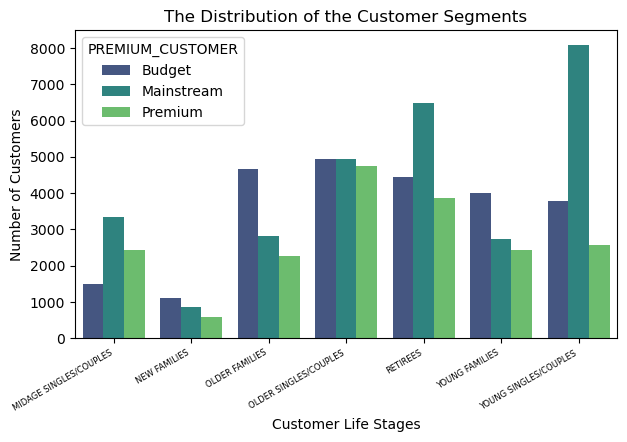

In [40]:
plt.figure(figsize=(7, 4))
sns.barplot(x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER', data=two_segmentation, errorbar=None, palette='viridis')
plt.xticks(rotation=30, ha='right', fontsize=6)
plt.title('The Distribution of the Customer Segments')
plt.xlabel('Customer Life Stages')
plt.ylabel('Number of Customers')
plt.show()

**The Tope 2 customer segments according to the number of customers are** (Significantly more than the other segments):
1. **Mainstream - Young Singles/Couples:** 8088 customers.
2. **Mainstream - Retirees:** 6479 customers.

<a name="6.C"></a>
### C. Customer Behavior Analysis:
**By Life Stages and Customer Premium (Cross Analysis):** Now, we will aggregate our dataset by calculating the defined metrics for Life Stages and Customer Premium categories.

In [41]:
## Grouping the dataset by LIFESTAGE and PREMIUM_CUSTOMER
grouped_df = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])

# Calculate total sales, average number of units per customer, and average price per unit.
result_df = pd.DataFrame({
    'total_sales': grouped_df['TOT_SALES'].sum(),
    'avg_num_of_units': grouped_df['PROD_QTY'].sum() / grouped_df['LYLTY_CARD_NBR'].nunique(),
    'avg_price_per_unit': grouped_df['TOT_SALES'].sum() / grouped_df['PROD_QTY'].sum(),
    'frequency_of_purchase' : grouped_df['TXN_ID'].nunique() / grouped_df['LYLTY_CARD_NBR'].nunique()
}).reset_index()

result_df

,LIFESTAGE,PREMIUM_CUSTOMER,total_sales,avg_num_of_units,avg_price_per_unit,frequency_of_purchase
0,MIDAGE SINGLES/COUPLES,Budget,35514.80,6.313830,3.739975,3.316489
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85,6.796108,4.000346,3.533234
2,MIDAGE SINGLES/COUPLES,Premium,58432.65,6.386672,3.763535,3.356643
3,NEW FAMILIES,Budget,21928.45,5.009892,3.936178,2.689748
4,NEW FAMILIES,Mainstream,17013.90,5.087161,3.939315,2.733804
5,NEW FAMILIES,Premium,11491.10,5.028912,3.886067,2.693878
6,OLDER FAMILIES,Budget,168363.25,9.639572,3.736009,4.905882
7,OLDER FAMILIES,Mainstream,103445.55,9.804309,3.726962,4.985164
8,OLDER FAMILIES,Premium,80658.40,9.578091,3.704855,4.872855
9,OLDER SINGLES/COUPLES,Budget,136769.80,7.145466,3.883299,3.712924


#### 1. Total Sales:

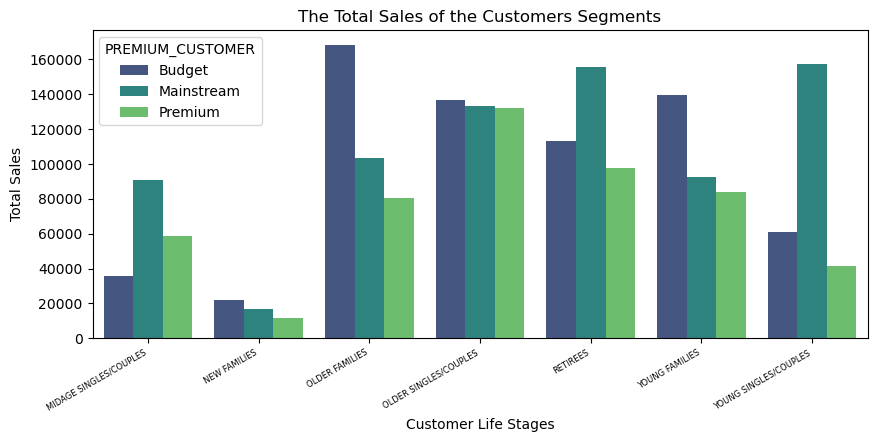

In [42]:
## Total Sales
plt.figure(figsize=(10, 4))
sns.barplot(x='LIFESTAGE', y='total_sales', hue='PREMIUM_CUSTOMER', data= result_df, errorbar=None, palette='viridis')
plt.xticks(rotation=30, ha='right', fontsize=6)
plt.title('The Total Sales of the Customers Segments')
plt.xlabel('Customer Life Stages')
plt.ylabel('Total Sales')
plt.show()

**The Top 3 customer segments according to the `Total Sales` are:**
1. **Budget - Older Families:** 168363.25
2. **Mainstream - Young Singles/Couples:** 157621.60
3. **Mainstream - Retirees:** 155677.05

**Note:** The high total sales for  `Mainstream - Young Singles/Couples` and `Mainstream - Retirees` may be due to the large number of customers, but for `Budget - Older Families`, the sitoation is different.
Although the number of customers in `Budget - Older Families` is almost 57.80% of the number of customers in `Mainstream - Young Singles/Couples`, the total sales of `Budget - Older Families` is greater than of `Mainstream - Young Singles/Couples`.
So we need to investigate more in these segments.

#### 2. Average Number of Units per Customer:

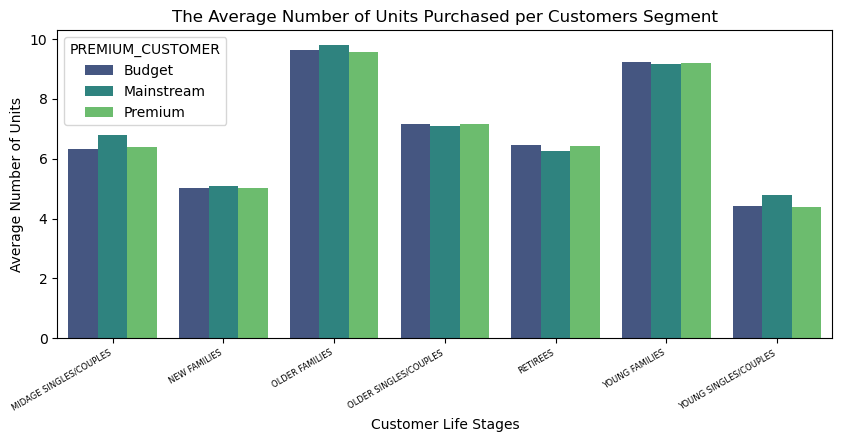

In [43]:
## Average Number of Units per Customer
plt.figure(figsize=(10,4))
sns.barplot(x='LIFESTAGE', y='avg_num_of_units', hue='PREMIUM_CUSTOMER', data= result_df, errorbar=None, palette='viridis')
plt.xticks(rotation=30, ha='right', fontsize=6)
plt.title('The Average Number of Units Purchased per Customers Segment')
plt.xlabel('Customer Life Stages')
plt.ylabel('Average Number of Units')
plt.show()

**Note:** in general, `Older Families` and `Young Families` have the highest average number of units per customer.
On average, the customer in `Budget-Older Families` segment purchases 9.64 units. This could be the reason for the high total sales for `Budget - Older Families`, because they tend to buy larger quantities than other customers. This is not the case with the other segments we focus on `Mainstream Young Singles/Couples` and `Mainstream Retirees`.

#### 3. Average Price per Unit:

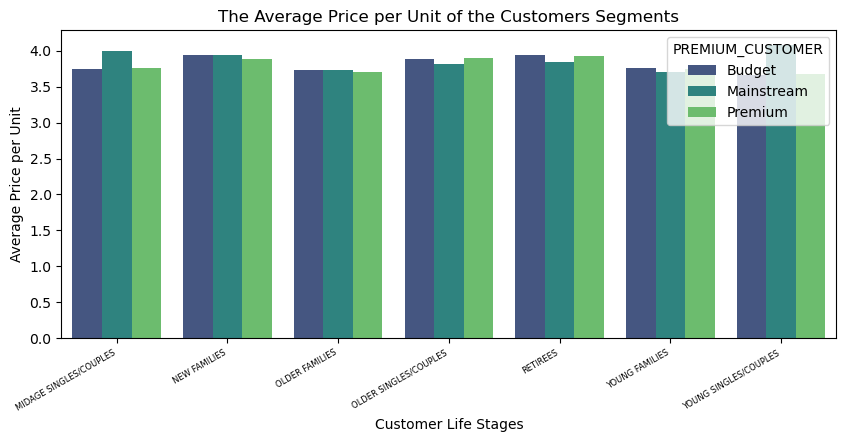

In [44]:
## Average Price per Unit
plt.figure(figsize=(10, 4))
sns.barplot(x='LIFESTAGE', y='avg_price_per_unit', hue='PREMIUM_CUSTOMER', data= result_df, errorbar=None, palette='viridis')
plt.xticks(rotation=30, ha='right', fontsize=6)
plt.title('The Average Price per Unit of the Customers Segments')
plt.xlabel('Customer Life Stages')
plt.ylabel('Average Price per Unit')
plt.show()

**Note:** Almost the value is somewhat similar between all segments, but the highest value is for `Mainstream - Young Singles/Couples`customers. The average price of unit that this customer purchases is 4.08.

#### 4. Frequency of Purchase:

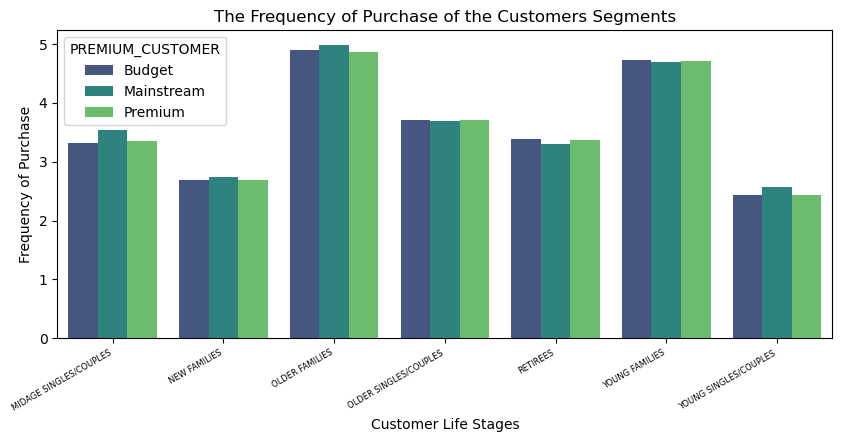

In [45]:
## Frequency of frequency_of_purchase
plt.figure(figsize=(10, 4))
sns.barplot(x='LIFESTAGE', y='frequency_of_purchase', hue='PREMIUM_CUSTOMER', data= result_df, errorbar=None, palette='viridis')
plt.xticks(rotation=30, ha='right', fontsize=6)
plt.title('The Frequency of Purchase of the Customers Segments')
plt.xlabel('Customer Life Stages')
plt.ylabel('Frequency of Purchase')
plt.show()

**Note:** `Older Families` and `Young Families`customers buy more often than others. This could be a good indicator of customer loyalty and is important to explore further. Also this could be the reason for the high total sales for Budget - `Older Families`.

**Note:** Also, it's important to pay attention to the `Young Singles/Couples`customers in terms of satisfaction and loyalty because their frequency of purchase is very low.

<a name="6.D"></a>
### D. Deep Dive into Customer Segments Analysis:
Now, we will choose segments that we found some interesting aspects about them, in order to analyze them more to get more insights.

According to the above results, I think `Mainstream - Young Singles/Couples` and `Budget - Older Families` are the most interesting segments to explore further.

**1. Mainstream - Young Singles/Couples:**
- Includes the largest number of customers.
- The second highest segment in terms of total sales.
- The highest segment in terms of average price per unit.
- One of the lowest in terms of average number of units per customer and frequency of purchase.

**2. Budget - Older Families:**
- The highest segment in terms of total sales.
- The second highest segment in terms of average number of units per customer and frequency of purchase.

**Note:** We will work on `Mainstream - Young Singles/Couples` and focus on brands that customers within this segment might prefer and the product size they tend to buy (Ex: Large size).

#### Mainstream - Young Singles/Couples:
The purpose of working more with this segment is to increase the retention rate of them because they are a high source of sales and the highest number of customers.

In [46]:
## Filter the dataset to include only customers within this segment
main_youn_sing_coup= merged_data[(merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')]
main_youn_sing_coup.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT_G,PROD_PRICE,BRAND_NAME
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-18,1,2,58,RRD Chikn&Garlic Aioli 150g,1,2.7,150,2.7,RRD
9,1010,YOUNG SINGLES/COUPLES,Mainstream,2018-09-11,1,10,51,Doritos Mexicana 170g,2,8.8,170,4.4,Doritos
10,1010,YOUNG SINGLES/COUPLES,Mainstream,2018-12-16,1,11,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1,300,5.1,Old El Paso
21,1018,YOUNG SINGLES/COUPLES,Mainstream,2018-09-05,1,22,3,Kettle Sensations Camembert & Fig 150g,1,4.6,150,4.6,Kettle
22,1018,YOUNG SINGLES/COUPLES,Mainstream,2018-11-30,1,23,97,RRD Salt & Vinegar 165g,1,3.0,165,3.0,RRD


##### Market Basket Analysis:

Now, we will performe Basket Analysis for `Mainstream - Young Singles/Couples` customer, in order to explore the most preferred brands and set of brands, that this segment most likely to purchase (as single brand or set of brands).

We will use `Apriori algorithm` to perform the Basket Analysis.

Firstly, we need to convert the `main_youn_sing_coup` dataset into a format that more easier to use with Apriori algorithm.

In [47]:
## Convert the BRAND_NAME into columns and TXN_ID into rows
temp_df = pd.crosstab(main_youn_sing_coup['TXN_ID'], main_youn_sing_coup['BRAND_NAME'])
temp_df.head()

BRAND_NAME,Burger Rings,CCs,Cheetos,Cheezels,Cobs Popd,Doritos,French Fries,Grain Waves,Infuzions,Kettle,...,Old El Paso,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW
TXN_ID,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
## Convert the values into 0 and 1 to indicate if the brand exist in the transaction or not (without frequency)

def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
apri_algo_df = temp_df.applymap(encode)
apri_algo_df.head()

BRAND_NAME,Burger Rings,CCs,Cheetos,Cheezels,Cobs Popd,Doritos,French Fries,Grain Waves,Infuzions,Kettle,...,Old El Paso,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW
TXN_ID,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
## Performe the Apriori algorithm
frequent_itemsets = apriori(apri_algo_df.astype('bool'), min_support=0.000001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,"(Pringles, Twisties)",(Doritos),0.000048,0.122215,0.000048,1.000000,8.182283,0.000042,inf,0.877827
2,"(Doritos, Twisties)",(Pringles),0.000144,0.111389,0.000048,0.333333,2.992513,0.000032,1.332916,0.665929
0,"(Pringles, Doritos)",(Twisties),0.000192,0.043305,0.000048,0.250000,5.773056,0.000040,1.275594,0.826941
5,(Twisties),"(Pringles, Doritos)",0.043305,0.000192,0.000048,0.001111,5.773056,0.000040,1.000920,0.864206
3,(Pringles),"(Doritos, Twisties)",0.111389,0.000144,0.000048,0.000432,2.992513,0.000032,1.000288,0.749296
4,(Doritos),"(Pringles, Twisties)",0.122215,0.000048,0.000048,0.000394,8.182283,0.000042,1.000346,1.000000


**Note:** According the previous results, the most popular brand combinations purchased together frequently by, `Mainstream - Young Singles/Couples` customers is ("Pringles", "Twisties" and "Doritos").

The customer in this segment who buy "Pringles" and "Twisties" are highly likely to buy "Doritos" in the same transaction.

##### Product Size Analysis:

Now, we will work on the product size that preferred by `Mainstream - Young Singles/Couples` and compare it to other segments.

In [50]:
grouped_df_2 = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])

# Calculate the average Pack Size for each segment
pack_size_df = pd.DataFrame({
    'Avg_Pack_Size': grouped_df_2['PROD_WEIGHT_G'].mean()
}).reset_index()

pack_size_df

,LIFESTAGE,PREMIUM_CUSTOMER,Avg_Pack_Size
0,MIDAGE SINGLES/COUPLES,Budget,180.187450
1,MIDAGE SINGLES/COUPLES,Mainstream,184.582786
2,MIDAGE SINGLES/COUPLES,Premium,181.577897
3,NEW FAMILIES,Budget,181.161730
4,NEW FAMILIES,Mainstream,181.699355
5,NEW FAMILIES,Premium,181.286973
6,OLDER FAMILIES,Budget,182.487219
7,OLDER FAMILIES,Mainstream,182.175021
8,OLDER FAMILIES,Premium,181.432618
9,OLDER SINGLES/COUPLES,Budget,182.289183


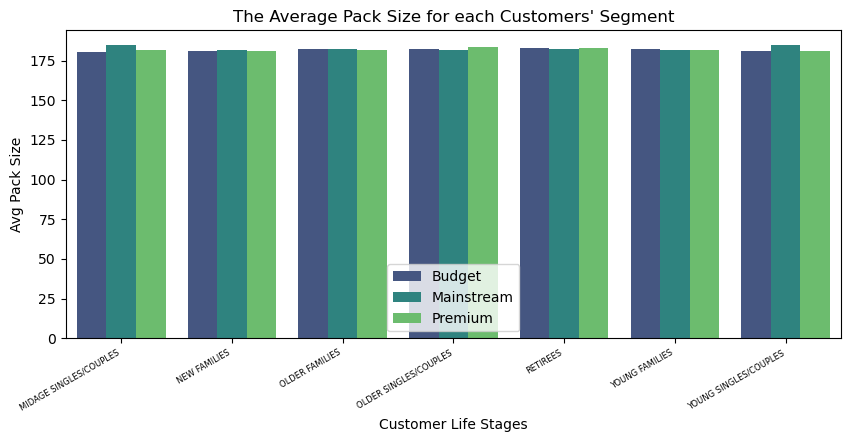

In [51]:
## Pack Size Average for all segments
plt.figure(figsize=(10, 4))
sns.barplot(x='LIFESTAGE', y='Avg_Pack_Size', hue='PREMIUM_CUSTOMER', data= pack_size_df, errorbar=None, palette='viridis')
plt.xticks(rotation=30, ha='right', fontsize=6)
plt.title("The Average Pack Size for each Customers' Segment")
plt.xlabel('Customer Life Stages')
plt.ylabel('Avg Pack Size')
plt.legend(loc=8)
plt.show()

**Note:** Almost all customers preffered somewhat the average pack size, but `Mainstream-Young Singles/Couples` has the highest average pack size

<a name="6.E"></a>
### E. Market Basket Analysis for all Customers:
Now, we will performe Basket Analysis for all customers, in order to explore the most preferred brands and set of brands, that most likely to purchase (as single brand or set of brands).

We will use `Apriori algorithm` to perform the Basket Analysis.

In [52]:
## Convert the BRAND_NAME into columns and TXN_ID into rows
temp_df = pd.crosstab(merged_data['TXN_ID'], merged_data['BRAND_NAME'])
temp_df.head()

BRAND_NAME,Burger Rings,CCs,Cheetos,Cheezels,Cobs Popd,Doritos,French Fries,Grain Waves,Infuzions,Kettle,...,Old El Paso,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW
TXN_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
## Convert the values into 0 and 1 to indicate if the brand exist in the transaction or not (without frequency)
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
apri_algo_df = temp_df.applymap(encode)
apri_algo_df.head()

BRAND_NAME,Burger Rings,CCs,Cheetos,Cheezels,Cobs Popd,Doritos,French Fries,Grain Waves,Infuzions,Kettle,...,Old El Paso,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW
TXN_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
## Performe the Apriori algorithm
frequent_itemsets = apriori(apri_algo_df.astype('bool'), min_support=0.000001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,"(Cheetos, Sunbites)",(Doritos),0.000004,0.106881,0.000004,1.000000,9.356221,0.000003,inf,0.893123
1,"(Doritos, Cheetos)",(Sunbites),0.000011,0.011432,0.000004,0.333333,29.158355,0.000004,1.482852,0.965716
14,"(Old El Paso, Twisties)",(Tyrrells),0.000011,0.024483,0.000004,0.333333,13.615078,0.000004,1.463276,0.926563
13,"(Tyrrells, Twisties)",(Old El Paso),0.000011,0.035432,0.000004,0.333333,9.407737,0.000003,1.446852,0.893715
12,"(Tyrrells, Old El Paso)",(Twisties),0.000015,0.035918,0.000004,0.250000,6.960242,0.000003,1.285442,0.856340
8,"(Infuzions, Grain Waves)",(RRD),0.000019,0.067531,0.000004,0.200000,2.961619,0.000003,1.165587,0.662359
7,"(RRD, Grain Waves)",(Infuzions),0.000030,0.053959,0.000004,0.125000,2.316567,0.000002,1.081190,0.568344
0,"(Doritos, Sunbites)",(Cheetos),0.000034,0.011124,0.000004,0.111111,9.988422,0.000003,1.112486,0.899915
6,"(Infuzions, RRD)",(Grain Waves),0.000046,0.029412,0.000004,0.083333,2.833323,0.000002,1.058823,0.647087
5,(Cheetos),"(Doritos, Sunbites)",0.011124,0.000034,0.000004,0.000342,9.988422,0.000003,1.000308,0.910007


**Note:** According the previous results, the most popular brand combinations purchased together frequently by all customers are: 
1. ("Cheetos", "Sunbites" and "Doritos").
2. ("Old El Paso", "Twisties" and "Tyrrells").
3. ("Grain Waves", "Infuzions" and "RRD").

The customer who buy "Cheetos" and "Sunbites" are highly likely to buy "Doritos" in the same transaction.

<a name="7"></a>
## 7. Conclusion:

<a name="7.A"></a>
### A. Insights:
- The total sales of all customers is `1,933,115`.
- On average, each customer purchase `6.95 packs`.
- On average, each customer made `3.62 purchases`.
- The Tope 2 customers segments according to the number of customers are (Significantly more than the other segments):
    1. Mainstream - Young Singles/Couples: `8088 customers`.
    2. Mainstream - Retirees: `6479 customers`.
- The Top 3 customer segments according to the Total Sales are:
    1. Budget - Older Families: `168363.25`
    2. Mainstream - Young Singles/Couples: `157621.60`
    3. Mainstream - Retirees: `155677.05`
- The drivers of high sales according to `Mainstream - Young Singles/Couples` segments are:
    - The high number of customers.
    - Purchasing Products with fairly high prices compared to other categories.
- The drivers of high sales according to `Budget - Older Families`:
    - Purchasing more quantities of packs than other segments.
    - Purchasing more often than other segments.
- The retention rate of `Mainstream - Young Singles/Couples` is somewhat low.
- The most popular brand combinations purchased together frequently by all customers are:
    1. ("Cheetos", "Sunbites" and "Doritos").
    2. ("Old El Paso", "Twisties" and "Tyrrells").
    3. ("Grain Waves", "Infuzions" and "RRD").
- The customer who buy "Cheetos" and "Sunbites" brands are highly likely to buy "Doritos" brand in the same transaction.
- According to `Mainstream - Young Singles/Couples`:
    - They prefer the the large pack size more than other segments.
    - The most popular brand combination purchased together frequently is ("Pringles", "Twisties" and "Doritos").
    - The customer who buy "Pringles" and "Twisties" brands are highly likely to buy "Doritos" brand in the same transaction.

<a name="7.B"></a>
### B. Recommendation:
- Exploring more the low retetion rate of `Mainstream - Young Singles/Couples` customers.
- Working more to attract new `Budget - Older Families` customers.
- Take into consideration the the brand combination that customers more likely to purchase together.